<a href="https://colab.research.google.com/github/rcofrer/Coursera_Capstone/blob/master/Off_shore_office_placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Big Corporation Off Shore offices placement

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction <a name="introduction"></a>

As the COVID-19 spreads, restrictions rise and the world went from commuting everyday to work to a forced home office work style. The economy of several countries suddenly stopped and this hurt small and big companies. However, one advantage big companies have (multinationals) is that they can quickly move their work force to countries where is cheaper for them to hire workers. As an effort to make the off shores offers attractive for the locals, big corporations are trying to locate their new offices in strategic parts of town that will offer their workers proximity to venues that they conveniently could use in their way to or from the office. One popular destination for big corporation off shore activities in Europe is Poland. This analysis will be focus in the region of Lesser Poland(Malopolska), where there are many off shore offices from big companies like HBSC or UBS. 

## Data <a name="data"></a>

### Geographical Data

For the purposes stated in the previous section the corresponding data set for the analysis will be information about different types of administrative division of the region Lesser Poland. 

In [0]:
import requests

url = 'https://data.opendatasoft.com/api/records/1.0/search/?dataset=geonames-postal-code%40public-us&q=Poland&rows=1093&sort=place_name&facet=country_code&facet=admin_name1&facet=admin_name2&facet=admin_name3&refine.country_code=PL&refine.admin_name1=Lesser+Poland'
results = requests.get(url)

In [0]:
import pandas as pd

# the key 'records' has the information needed for the region of Lesser Poland
results.json()['records']

df = pd.DataFrame(results.json()['records'])

In [125]:
df.columns

Index(['datasetid', 'recordid', 'fields', 'geometry', 'record_timestamp'], dtype='object')

### Data preprocessing

In [126]:
# information that will be used 
df['fields'].iloc[3]

{'accuracy': '6',
 'admin_code1': '77',
 'admin_code2': '1203',
 'admin_code3': '120301',
 'admin_name1': 'Lesser Poland',
 'admin_name2': 'Powiat chrzanowski',
 'admin_name3': 'Alwernia',
 'coordinates': [50.0627, 19.5387],
 'country_code': 'PL',
 'latitude': '50.0627',
 'longitude': '19.5387',
 'place_name': 'Alwernia',
 'postal_code': '32-566'}

In [127]:
# Creating the malopolska DataFrame
malopolska_data = pd.DataFrame(columns=['County','District','PlaceName','PostalCode','Latitude','Longitude'])
malopolska_data

,County,District,PlaceName,PostalCode,Latitude,Longitude


In [0]:
malopolska_data['County'] = df.apply(lambda x: x['fields']['admin_name2'],axis=1)
malopolska_data['District'] = df.apply(lambda x: x['fields']['admin_name3'],axis=1)
malopolska_data['PlaceName'] = df.apply(lambda x: x['fields']['place_name'],axis=1)
malopolska_data['PostalCode'] = df.apply(lambda x: x['fields']['postal_code'],axis=1)
malopolska_data['Latitude'] = df.apply(lambda x: x['fields']['latitude'],axis=1)
malopolska_data['Longitude'] = df.apply(lambda x: x['fields']['longitude'],axis=1)

In [129]:
malopolska_data.dtypes
# Need to change types of Latitude and Longitude data

County        object
District      object
PlaceName     object
PostalCode    object
Latitude      object
Longitude     object
dtype: object

In [130]:
malopolska_data['Latitude'] = pd.to_numeric(malopolska_data['Latitude'])
malopolska_data['Longitude'] = pd.to_numeric(malopolska_data['Longitude'])
malopolska_data.dtypes

County         object
District       object
PlaceName      object
PostalCode     object
Latitude      float64
Longitude     float64
dtype: object

The following shows the DataFrame complete

In [131]:
malopolska_data

,County,District,PlaceName,PostalCode,Latitude,Longitude
0,Powiat dąbrowski,Olesno,Adamierz,33-210,50.2031,20.8995
1,Powiat miechowski,Gmina Gołcza,Adamowice,32-075,50.3797,19.8553
2,Powiat krakowski,Zabierzów,Aleksandrowice,32-084,50.0838,19.7608
3,Powiat chrzanowski,Alwernia,Alwernia,32-566,50.0627,19.5387
4,Powiat wadowicki,Andrychów,Andrychów,34-120,49.8529,19.3403
...,...,...,...,...,...,...
1088,Kraków,Kraków,Kraków,31-573,50.0577,19.9978
1089,Kraków,Kraków,Kraków,31-579,50.0724,20.0086
1090,Kraków,Kraków,Kraków,31-640,50.0970,20.0211
1091,Kraków,Kraków,Kraków,31-702,50.0969,20.0582


In [132]:
malopolska_data.shape

(1093, 6)

In [133]:
malopolska_data[malopolska_data['PostalCode']=='38-340']

,County,District,PlaceName,PostalCode,Latitude,Longitude
73,Powiat gorlicki,Biecz,Biecz,38-340,49.7349,21.2595
95,Powiat gorlicki,Biecz,Binarowa,38-340,49.7558,21.2208
496,Powiat gorlicki,Biecz,Głęboka,38-340,49.7192,21.3154
604,Powiat gorlicki,Biecz,Grudna Kępska,38-340,49.7367,21.3045
892,Powiat gorlicki,Biecz,Korczyna,38-340,49.7124,21.2514


It can be seen in the previous tables that there are places that have the same County, District and place name, but they differ in postal code; and places that have the same County, District and postal code, but they differ in the place name. these situation point to different neighborhoods in the same places. For these reasons a label for a neighborhood will be compose of the place name and its postal code, to be able to fully differentiate each neighborhood.

In [0]:
malopolska_data['Neighborhood']= malopolska_data['PlaceName']+','+ malopolska_data['PostalCode']
malopolska_data.drop(['PlaceName','PostalCode'],axis=1,inplace=True)

In [135]:
malopolska_data = malopolska_data[['County','District','Neighborhood','Latitude','Longitude']]
malopolska_data

,County,District,Neighborhood,Latitude,Longitude
0,Powiat dąbrowski,Olesno,"Adamierz,33-210",50.2031,20.8995
1,Powiat miechowski,Gmina Gołcza,"Adamowice,32-075",50.3797,19.8553
2,Powiat krakowski,Zabierzów,"Aleksandrowice,32-084",50.0838,19.7608
3,Powiat chrzanowski,Alwernia,"Alwernia,32-566",50.0627,19.5387
4,Powiat wadowicki,Andrychów,"Andrychów,34-120",49.8529,19.3403
...,...,...,...,...,...
1088,Kraków,Kraków,"Kraków,31-573",50.0577,19.9978
1089,Kraków,Kraków,"Kraków,31-579",50.0724,20.0086
1090,Kraków,Kraków,"Kraków,31-640",50.0970,20.0211
1091,Kraków,Kraków,"Kraków,31-702",50.0969,20.0582


Now with this geographical information it is possible to extract venues information near to these locations.

### Venues Data 

In [0]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20200505' # Foursquare API version
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [59]:
venues_list=[]
names       = malopolska_data['neighborhood']
latitudes   = malopolska_data['Latitude']
longitudes  = malopolska_data['Longitude']
radius      = 200

for name, lat, lng in zip(names, latitudes, longitudes):
    print(name)
            
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        LIMIT)
            
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
        
    # return only relevant information for each nearby venue
    venues_list.append([(
        name, 
        lat, 
        lng, 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results])

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['Neighborhood', 
              'Neighborhood Latitude', 
              'Neighborhood Longitude', 
              'Venue', 
              'Venue Latitude', 
              'Venue Longitude', 
              'Venue Category']

Adamierz,33-210
Adamowice,32-075
Aleksandrowice,32-084
Alwernia,32-566
Andrychów,34-120
Andrzejówka,33-370
Antolka,32-210
Augustyny,34-607
Augustyny,34-608
Babica,34-103
Babice,32-551
Babice,32-600
Bachowice,34-115
Bachowice,34-116
Bącza-Kunina,33-335
Baczków,32-708
Baczyn,34-211
Baczyn,32-084
Bałażówka,34-600
Balice,32-083
Balice,30-083
Balice,32-080
Balin,32-500
Banica,38-315
Bańska Niżna,34-424
Bańska Wyżna,34-424
Baranówka,32-010
Barbarka,32-046
Barcice,33-342
Barcice Dolne,33-342
Barcice Dolne,33-340
Barczków,32-813
Barnowiec,33-336
Bartkowa Posadowa,33-318
Bartne,38-307
Barwałd Dolny,34-124
Barwałd Górny,34-130
Barwałd Średni,34-124
Barwałd Średni,34-142
Batowice,32-087
Batowice,32-086
Bębło,32-089
Bębło,32-085
Bęczarka,32-444
Bęczyn,34-113
Będkowice,32-085
Będkowice,32-089
Bednarka,38-305
Będzieszyna,32-860
Bełdno,32-731
Berest,33-380
Bessów,32-711
Biadoliny Radłowskie,32-828
Biadoliny Radłowskie,32-830
Biadoliny Szlacheckie,32-828
Biadoliny Szlacheckie,32-854
Biała,33-150
Biała

In [65]:
nearby_venues['Neighborhood'].nunique()

173

In [0]:
malopolska_venues = nearby_venues
#malopolska_venues.to_csv('/content/malopolska_venues.csv')

In [0]:
# malopolska_venus = pd.read_csv('malopolska_venues.csv')

Let us check some entries of the DataFrame with the nearby venues.

In [68]:
print(malopolska_venues.shape)
malopolska_venues.head()

(683, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Andrychów,34-120",49.8529,19.3403,Rynek,49.854685,19.340387,Plaza
1,"Andrychów,34-120",49.8529,19.3403,Restauracja Mickiewicz,49.854205,19.340313,Restaurant
2,"Bębło,32-089",50.1831,19.7901,Stadion Orzeł Bębło,50.184355,19.789984,Soccer Field
3,"Białka Tatrzańska,34-405",49.3891,20.1080,Nad Białką,49.390690,20.109108,River
4,"Białka Tatrzańska,34-530",49.3390,20.1022,Schronisko Smaków Magda Gessler,49.339583,20.101449,Polish Restaurant


## Methodology <a name="methodology"></a>

This project is focus in determining locations for new offshore offices for big corporation in the region of Malopolska(Lesser Poland). To this end, a good location would be one that has attractive venues nearby, that is, restaurants, gyms, parks or supermarkets. A good location is supposed to facilitate the employers life, providing necesary or quality improving services in their way in or out of work.

To achieve the project's objetive, information about **neighborhoods** and their **geographical coordinates** was collected; and data of nearby(**200 meters radius**) **venues** was obtained  using the Foursquare API.

Next, a exploratory analysis of the information obtained is necessary to gain insight about the different types of venues availables per neighborhood and its distribution among them. 

Once the exploratory analysis is completed, the neighborhoods will be clustered by similarities on the venues they possess using the **k-means** algorithm. The cluster will be characterized and then it will be possible to determine the best neighborhoods for new offices' location to ensure that they are appealing for potential workers.

## Analysis <a name="analysis"></a>

First, let us visualize the distribution of the neighborhoods collected from the **Opendatasoft** API.

In [61]:
import folium
# create map of New York using latitude and longitude values
# Coordinates of Malopolska region
latitude    =49.7225
longitude   =20.2503
map_malopolska = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, neighborhood  in zip(malopolska_data['Latitude'], malopolska_data['Longitude'], malopolska_data['neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_malopolska) 
map_malopolska 

Now, let us see how many venues are returned per neighborhood

In [69]:
malopolska_venues.groupby(by='Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Andrychów,34-120",2,2,2,2,2,2
"Białka Tatrzańska,34-405",1,1,1,1,1,1
"Białka Tatrzańska,34-530",6,6,6,6,6,6
"Bielanka,34-723",1,1,1,1,1,1
"Bochnia,32-700",4,4,4,4,4,4
...,...,...,...,...,...,...
"Kraków,31-860",1,1,1,1,1,1
"Kraków,31-903",3,3,3,3,3,3
"Kraków,31-924",1,1,1,1,1,1


And let us find out how many unique categories exists in the region

In [70]:
print('There are {} uniques categories.'.format(len(malopolska_venues['Venue Category'].unique())))

There are 142 uniques categories.


One hot encoding the venues category to get the frequency of venues categories in each one of the neighborhoods. 

In [73]:
# one hot encoding
malopolska_onehot = pd.get_dummies(malopolska_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
malopolska_onehot['Neighborhood'] = malopolska_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [malopolska_onehot.columns[-1]] + list(malopolska_onehot.columns[:-1])
malopolska_onehot = malopolska_onehot[fixed_columns]
malopolska_grouped = malopolska_onehot.groupby('Neighborhood').mean().reset_index()
malopolska_grouped

,Neighborhood,Argentinian Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Bakery,Bar,Bed & Breakfast,Beer Bar,Betting Shop,Bistro,Boarding House,Bookstore,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Campground,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Diner,Discount Store,...,Public Art,Ramen Restaurant,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Repair,Shopping Mall,Ski Area,Snack Place,Soccer Field,Soup Place,Squash Court,Stables,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tennis Court,Thai Restaurant,Theater,Theme Park,Tourist Information Center,Train,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Vacation Rental,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Water Park,Wine Bar,Wine Shop,Yoga Studio
0,"Andrychów,34-120",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,"Białka Tatrzańska,34-405",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,"Białka Tatrzańska,34-530",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,...,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,"Bielanka,34-723",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,"Bochnia,32-700",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,"Kraków,31-860",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
169,"Kraków,31-903",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0

In [0]:
# function to return the top venues in a given neighborhood.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Let us explore the top 5 venues in each location

In [79]:
import numpy as np
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = malopolska_grouped['Neighborhood']

for ind in np.arange(malopolska_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(malopolska_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Andrychów,34-120",Restaurant,Plaza,Falafel Restaurant,Food,Flower Shop
1,"Białka Tatrzańska,34-405",River,Falafel Restaurant,Food,Flower Shop,Flea Market
2,"Białka Tatrzańska,34-530",Polish Restaurant,Restaurant,Performing Arts Venue,Diner,Eastern European Restaurant
3,"Bielanka,34-723",Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop
4,"Bochnia,32-700",Diner,Café,Plaza,Pizza Place,Farm


### Neighborhood clustering
Now we can procced to cluster the neighboorhods. First, the appropiate number of cluster will be determined calculating the silhouette score for a diferent number of clusters and then plot the results. Just to be clear, the silhouette score ranges between -1 and 1, being 1 the best value, representing that the clusters are appropiate.

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
malopolska_grouped_clustering = malopolska_grouped.drop('Neighborhood', 1)

sil =[]
for kclusters in np.arange(2,20,1):
  # run k-means clustering
  kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(malopolska_grouped_clustering)
  sil.append(silhouette_score(malopolska_grouped_clustering,kmeans.labels_))

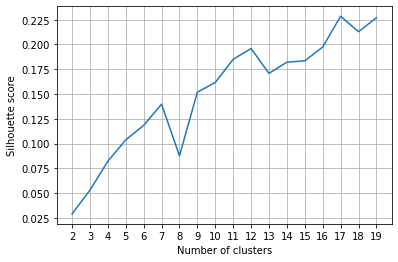

In [105]:
# let us plot the inertias 
import matplotlib.pyplot as plt
plt.plot(np.arange(2,20,1),sil)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.xticks(np.arange(2,20,1))
plt.grid('True')

plt.show()

It is natural that as the number of clusters rises the similarity of its elements improves. But to not end up with each element in one cluster, it is decided to take a number of cluster equal to 7, that is before the break seen in the plot.

In [0]:
# proceed to cluster the dataset.
kclusters  = 7
kmeans    = KMeans(n_clusters=kclusters, random_state=0).fit(malopolska_grouped_clustering)


In [168]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

malopolska_merged = malopolska_data

# merge malopolska_grouped with malopolska_data to add latitude/longitude for each neighborhood
malopolska_merged = malopolska_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

malopolska_merged.head() 

,County,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Powiat dąbrowski,Olesno,"Adamierz,33-210",50.2031,20.8995,NaN,NaN,NaN,NaN,NaN,NaN
1,Powiat miechowski,Gmina Gołcza,"Adamowice,32-075",50.3797,19.8553,NaN,NaN,NaN,NaN,NaN,NaN
2,Powiat krakowski,Zabierzów,"Aleksandrowice,32-084",50.0838,19.7608,NaN,NaN,NaN,NaN,NaN,NaN
3,Powiat chrzanowski,Alwernia,"Alwernia,32-566",50.0627,19.5387,NaN,NaN,NaN,NaN,NaN,NaN
4,Powiat wadowicki,Andrychów,"Andrychów,34-120",49.8529,19.3403,0.0,Restaurant,Plaza,Falafel Restaurant,Food,Flower Shop


It is possible to see that some neighborgood have Nan values. This is because they do not have nearby venues. Let us drop those rows.

In [169]:
malopolska_merged.dropna(axis=0,inplace=True)
malopolska_merged

,County,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Powiat wadowicki,Andrychów,"Andrychów,34-120",49.8529,19.3403,0.0,Restaurant,Plaza,Falafel Restaurant,Food,Flower Shop
41,Powiat krakowski,Gmina Wielka Wieś,"Bębło,32-089",50.1831,19.7901,0.0,Soccer Field,Yoga Studio,Dance Studio,Food,Flower Shop
63,Powiat tatrzański,Gmina Bukowina Tatrzańska,"Białka Tatrzańska,34-405",49.3891,20.1080,0.0,River,Falafel Restaurant,Food,Flower Shop,Flea Market
64,Powiat tatrzański,Gmina Bukowina Tatrzańska,"Białka Tatrzańska,34-530",49.3390,20.1022,0.0,Polish Restaurant,Restaurant,Performing Arts Venue,Diner,Eastern European Restaurant
76,Powiat nowotarski,Raba Wyżna,"Bielanka,34-723",49.5247,19.8880,0.0,Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop
...,...,...,...,...,...,...,...,...,...,...,...
1088,Kraków,Kraków,"Kraków,31-573",50.0577,19.9978,0.0,Warehouse Store,Yoga Studio,Falafel Restaurant,Food,Flower Shop
1089,Kraków,Kraków,"Kraków,31-579",50.0724,20.0086,0.0,Department Store,Auto Dealership,Farm,Food Truck,Food & Drink Shop
1090,Kraków,Kraków,"Kraków,31-640",50.0970,20.0211,0.0,Food & Drink Shop,Indoor Play Area,Bakery,Yoga Studio,Farm
1091,Kraków,Kraków,"Kraków,31-702",50.0969,20.0582,1.0,Playground,Falafel Restaurant,Food,Flower Shop,Flea Market


In [153]:
malopolska_merged.dtypes

County                    object
District                  object
Neighborhood              object
Latitude                 float64
Longitude                float64
Cluster Labels           float64
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
dtype: object

Let us visualize the resulting clusters.

In [170]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
latitude    =49.7225
longitude   =20.2503
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(malopolska_merged['Latitude'], malopolska_merged['Longitude'], malopolska_merged['Neighborhood'], malopolska_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results and Discussion <a name="results"></a>

**Cluster 1**: Neighborhoods with a great variety of venues, being most of them leasure or food related.

In [171]:
malopolska_merged.loc[malopolska_merged['Cluster Labels'] == 0, malopolska_merged.columns[[2] + list(range(5, malopolska_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,"Andrychów,34-120",0.0,Restaurant,Plaza,Falafel Restaurant,Food,Flower Shop
41,"Bębło,32-089",0.0,Soccer Field,Yoga Studio,Dance Studio,Food,Flower Shop
63,"Białka Tatrzańska,34-405",0.0,River,Falafel Restaurant,Food,Flower Shop,Flea Market
64,"Białka Tatrzańska,34-530",0.0,Polish Restaurant,Restaurant,Performing Arts Venue,Diner,Eastern European Restaurant
76,"Bielanka,34-723",0.0,Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop
...,...,...,...,...,...,...,...
1087,"Kraków,31-519",0.0,Pharmacy,Bar,Yoga Studio,Farm,Food
1088,"Kraków,31-573",0.0,Warehouse Store,Yoga Studio,Falafel Restaurant,Food,Flower Shop
1089,"Kraków,31-579",0.0,Department Store,Auto Dealership,Farm,Food Truck,Food & Drink Shop
1090,"Kraków,31-640",0.0,Food & Drink Shop,Indoor Play Area,Bakery,Yoga Studio,Farm


**Cluster 2**:
Neighborhoods close to historical places, plazas and restaurants. 

In [172]:
malopolska_merged.loc[malopolska_merged['Cluster Labels'] == 1, malopolska_merged.columns[[2] + list(range(5, malopolska_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
248,"Bydlin,32-340",1.0,Historic Site,Plaza,Yoga Studio,Falafel Restaurant,Food
837,"Klucze,32-310",1.0,Playground,Falafel Restaurant,Food,Flower Shop,Flea Market
944,"Kraków,30-509",1.0,Dance Studio,Historic Site,Playground,Discount Store,Dog Run
945,"Kraków,30-551",1.0,Historic Site,Sushi Restaurant,Indian Restaurant,Hotel,Hobby Shop
946,"Kraków,30-568",1.0,Historic Site,Yoga Studio,Farm,Food & Drink Shop,Food
993,"Kraków,31-701",1.0,Playground,Dumpling Restaurant,Falafel Restaurant,Food,Flower Shop
1064,"Kraków,30-831",1.0,Historic Site,Yoga Studio,Farm,Food & Drink Shop,Food
1084,"Kraków,31-456",1.0,Paper / Office Supplies Store,Playground,Yoga Studio,Farm,Food
1091,"Kraków,31-702",1.0,Playground,Falafel Restaurant,Food,Flower Shop,Flea Market


**Cluster 3**: Neighborhood most appealing for tourists. Near to hotels, tram and bus station as to places to eat.

In [173]:
malopolska_merged.loc[malopolska_merged['Cluster Labels'] == 2, malopolska_merged.columns[[2] + list(range(5, malopolska_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
352,"Czorsztyn,34-404",2.0,Hotel,Cheese Shop,Department Store,Food & Drink Shop,Food
353,"Czorsztyn,24-440",2.0,Hotel,Farm,Food & Drink Shop,Food,Flower Shop
763,"Kamienica,34-608",2.0,Hotel,Farm,Food & Drink Shop,Food,Flower Shop
941,"Kraków,30-443",2.0,Hotel,Modern European Restaurant,Food Truck,Food,Flower Shop
955,"Kraków,30-696",2.0,Hotel,Supermarket,Dessert Shop,Diner,Discount Store
1003,"Kraków,31-924",2.0,Hotel,Farm,Food & Drink Shop,Food,Flower Shop
1032,"Kraków,30-308",2.0,Hotel,Tram Station,Office,Intersection,Food
1038,"Kraków,30-403",2.0,Hotel,Farm,Food & Drink Shop,Food,Flower Shop
1049,"Kraków,30-609",2.0,Hotel,Supermarket,Dessert Shop,Diner,Discount Store
1068,"Kraków,31-026",2.0,Hotel,Hostel,Farm,Food & Drink Shop,Food


**Cluster 4**: Neighborhoods of mostly residential areas. They stand out in grocery stores and leasure venues.

In [174]:
malopolska_merged.loc[malopolska_merged['Cluster Labels'] == 3, malopolska_merged.columns[[2] + list(range(5, malopolska_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
372,"Dąbrowa Tarnowska,33-200",3.0,Gym,Grocery Store,Food Truck,Food,Flower Shop
523,"Gołcza,32-200",3.0,Grocery Store,Plaza,Falafel Restaurant,Food,Flower Shop
619,"Grzegorzowice Wielkie,32-095",3.0,Grocery Store,Yoga Studio,French Restaurant,Food & Drink Shop,Food
721,"Jerzmanowice,32-049",3.0,Grocery Store,Yoga Studio,French Restaurant,Food & Drink Shop,Food
732,"Jordanów,34-240",3.0,Grocery Store,Yoga Studio,French Restaurant,Food & Drink Shop,Food
964,"Kraków,30-868",3.0,Grocery Store,Yoga Studio,French Restaurant,Food & Drink Shop,Food
1028,"Kraków,30-224",3.0,Grocery Store,Yoga Studio,French Restaurant,Food & Drink Shop,Food


**Cluster 5**: Neighborhoods withou a great variety of venues

In [175]:
malopolska_merged.loc[malopolska_merged['Cluster Labels'] == 4, malopolska_merged.columns[[2] + list(range(5, malopolska_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1010,"Kraków,30-021",4.0,Garden,Yoga Studio,French Restaurant,Food & Drink Shop,Food
1077,"Kraków,31-221",4.0,Garden,Yoga Studio,French Restaurant,Food & Drink Shop,Food


**Cluster 6**: Neighborhoods withouth a great variety of venues. 

In [176]:
malopolska_merged.loc[malopolska_merged['Cluster Labels'] == 5, malopolska_merged.columns[[2] + list(range(5, malopolska_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
305,"Chyżne,34-481",5.0,Polish Restaurant,Yoga Studio,Falafel Restaurant,Food,Flower Shop
717,"Jazowsko,33-390",5.0,Polish Restaurant,Yoga Studio,Falafel Restaurant,Food,Flower Shop
910,"Kotówka,34-741",5.0,Polish Restaurant,Yoga Studio,Falafel Restaurant,Food,Flower Shop
1024,"Kraków,30-210",5.0,French Restaurant,Polish Restaurant,Falafel Restaurant,Food,Flower Shop
1041,"Kraków,30-437",5.0,Polish Restaurant,Yoga Studio,Falafel Restaurant,Food,Flower Shop


**Cluster 7**: Neighborhoods closer to nature and leisure venues.

In [177]:
malopolska_merged.loc[malopolska_merged['Cluster Labels'] == 6, malopolska_merged.columns[[2] + list(range(5, malopolska_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
938,"Kraków,30-319",6.0,Park,Yoga Studio,Farm,Food,Flower Shop
942,"Kraków,30-445",6.0,Park,Yoga Studio,Farm,Food,Flower Shop
992,"Kraków,31-623",6.0,Bus Stop,Park,Department Store,Food & Drink Shop,Food
1035,"Kraków,30-323",6.0,Park,Yoga Studio,Farm,Food,Flower Shop
1066,"Kraków,30-838",6.0,Park,Yoga Studio,Farm,Food,Flower Shop


From the cluster characterization presented, the following insights are obtained. 



*   Cluster 5,6 and 7 do not offer a great variety of venues, centering in types of venues as restaurantes, parks, and leisure activities.
*   Cluster 4 represent more residential areas and we could rule out theses neighborhoods as potential office location. City regulation may be the reason behind these areas being mostly residential.

*   Cluster 2 and 3 represent attractive neighborhoods for tourist, with moslty historical places, hotels, restaurants and means of transport.

* Finally Cluster 1 offer a great variety of venues, being diverse between each of its neighborhoods. But most importantly, its neighborhoods are far from similar to the other clusters. This last fact lead to think that a neighborhood in this cluster may be a good candidate for an office location and what is left to do is locate a neighborhood with venues that the corporations think add value to the office. 


## Conclusion <a name="conclusion"></a>

The main objective of this analysis was to find possible location for an offshore office for a big corporation given infomation about the neighborhood in the region and venues nearby them.  Thanks to the exploratory analysis and posterior clustering was possible to characterize the neighborhoods in the region and rule out which ones were not a good fit for any kind office. 

Finally, we were left with several possible candidates all belonging to one of the characterized clusters. Taking these possible candidates and aligning them with the corporations' priorities for their workers should narrow down the candidates to the potential office location for each corporation. Ensuring the availability of certain venues to their employees.
 